# Neural Network Approach

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# a dictionary of industry sector symbols
group_dictionary = pd.read_csv('group_dictionary.csv', sep=';')
column_names_dictionary = pd.read_csv('column_names_dictionary.csv', sep=';')
test_data_no_target = pd.read_csv('test_data_no_target.csv', sep=';', decimal=',')
training_data = pd.read_csv('training_data.csv', sep=';', decimal=',')

display(group_dictionary)
display(column_names_dictionary)
display(test_data_no_target)
display(training_data)

,CODE,NUM,SECTOR
0,G1,1,Financials
1,G2,2,Industrials
2,G3,3,Energy
3,G4,4,Information Technology
4,G5,5,Consumer Staples
5,G6,6,Health Care
6,G7,7,Utilities
7,G8,8,Materials
8,G9,9,Consumer Discretionary
9,G10,10,Real Estate


,CODE,INDEX,INDICATOR NAME
0,Group,1,Industry sector
1,I1,2,"Return on Average Total Assets - %, TTM"
2,I2,3,"Return on Average Common Equity - %, TTM"
3,I3,4,"EBITDA Percentage of Common Equity, TTM"
4,I4,5,"EBITDA Percentage of Total Fixed Assets - Net,..."
...,...,...,...
112,dI54,113,1-year Absolute Change of Total Liabilities Pe...
113,dI55,114,1-year Absolute Change of Long Term Debt Perce...
114,dI56,115,1-year Absolute Change of Book Value Percentag...
115,dI57,116,1-year Absolute Change of Cash Flow from Opera...


,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,G3,0.039284,-0.034382,-0.040373,0.090023,-0.055953,0.049229,0.016236,-0.045865,0.692039,...,-0.377892,-0.410908,-0.417438,-0.220481,0.002526,0.124543,-0.219341,0.148324,0.020379,-0.004969
1,G9,-0.491713,-0.039484,-0.043612,-0.320312,0.065520,-0.216314,-0.366573,-0.052790,-0.370449,...,0.553799,0.660505,0.806000,0.781506,-0.012519,-0.014169,0.669341,0.015033,0.023411,0.007037
2,G7,-0.744979,-0.038271,-0.038631,-0.824021,0.117907,-1.434879,-0.707810,-0.073176,-1.698337,...,0.707252,0.909110,0.738062,-0.024403,0.032079,0.095528,0.350733,-0.149682,0.005134,1.135389
3,G2,0.694507,-0.026038,-0.038985,1.892921,-0.100102,0.022436,-0.198048,-0.050572,0.208738,...,-0.120561,-0.118927,-0.130250,-0.000468,0.002082,0.023541,-0.044464,0.033332,0.079054,-0.002624
4,G2,0.207123,-0.020462,-0.033451,-0.010191,-0.146812,0.235521,0.044640,-0.029062,0.464286,...,-0.672086,-0.679972,-1.136937,-0.789870,0.007839,-0.424394,-0.704341,0.011889,0.936284,-0.015745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,G9,-1.192924,-0.049079,-0.049806,-0.513692,-0.081669,-0.334987,-0.484038,-0.063376,-0.860113,...,0.280022,0.197899,0.425563,0.146857,0.007887,0.144111,0.556732,0.809250,0.040464,-0.000838
1996,G11,0.761006,-0.028790,-0.040586,-0.098537,0.334470,0.177993,0.733065,-0.032186,2.498567,...,-0.140446,NaN,-0.044562,0.508117,0.007100,0.492209,0.634159,-0.389522,0.030106,0.019739
1997,G4,0.663620,-0.014721,-0.035249,2.367521,0.035822,0.437514,0.241244,-0.033637,0.475282,...,-0.562151,-0.694239,-0.974187,0.052026,0.026136,0.287294,-0.278286,-0.283358,-0.005308,0.001944
1998,G1,-0.887896,-0.031149,-0.044787,NaN,3.235044,9.613638,10.032149,0.096885,0.049668,...,NaN,NaN,NaN,NaN,-0.117762,0.038035,-0.140377,-1.110764,NaN,0.000807


,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1.0,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1.0,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1.0,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1.0,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1.0,0.235055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,G5,0.332619,-0.022280,-0.036182,-0.362375,-0.016054,0.101272,-0.123533,-0.041546,0.132791,...,-0.150312,-0.107597,-0.000717,0.038413,-0.203777,-0.087741,-0.158301,0.016253,-1.0,-0.097556
4433,G7,-1.129862,-0.050950,-0.038761,-0.879396,-0.255241,-0.847043,-0.104296,-0.051605,-1.062027,...,0.052875,0.049896,0.033956,0.272288,0.067356,-0.154958,-0.014361,0.006626,1.0,0.077580
4434,G9,-0.403215,-0.026772,-0.045606,-0.273136,-0.406511,-0.582273,-0.842488,-0.091742,-2.307336,...,-0.056813,-0.218779,0.106911,0.241575,0.369228,-0.031251,0.006131,NaN,-1.0,-0.109834
4435,G6,-0.459162,-0.039922,-0.053567,-0.521321,-0.262081,0.106103,-0.049761,-0.061892,-0.729958,...,-0.348813,-0.496312,0.052111,0.749317,1.198094,-0.071096,0.010909,0.001365,1.0,0.103074


In [7]:
training_data.isna().sum()

Group        0
I1           0
I2           0
I3           0
I4         293
          ... 
dI56        10
dI57        75
dI58       140
Class        1
Perform      1
Length: 119, dtype: int64

In [8]:
training_data = training_data.dropna()
training_data

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1.0,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1.0,0.127771
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1.0,0.235055
5,G8,0.412335,-0.017345,0.000320,-0.172803,0.347920,0.653547,0.666238,0.017413,1.650159,...,0.346750,0.480494,-0.032602,-0.115915,-0.205738,-0.520875,0.215337,-0.004419,1.0,0.295635
6,G2,1.940864,-0.015633,-0.031934,0.978646,-0.143657,-0.060827,-0.207654,-0.039914,1.595729,...,-0.147437,-0.074558,-0.001843,-0.099887,-0.131061,0.066714,0.030109,-0.015794,1.0,0.215978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,G9,2.396571,0.032585,0.003241,2.796287,-0.680361,-0.414612,-0.707223,-0.070718,-1.580209,...,0.352063,0.006221,0.073676,0.025162,1.329646,0.079969,-0.806456,1.751744,-1.0,-0.116572
4430,G7,-0.550703,-0.031264,-0.036585,-0.835704,0.188197,-0.821073,0.396195,-0.043516,-0.781959,...,0.094687,0.042818,0.002426,-0.001642,0.145918,0.069010,0.003885,0.004134,0.0,0.008646
4431,G8,0.171147,-0.018667,-0.021133,-0.426442,-0.134417,-0.128016,0.024938,-0.026202,0.331625,...,-0.059312,-0.011753,0.048370,0.313162,0.298347,-0.102490,-0.002161,-0.001826,-1.0,-0.058341
4432,G5,0.332619,-0.022280,-0.036182,-0.362375,-0.016054,0.101272,-0.123533,-0.041546,0.132791,...,-0.150312,-0.107597,-0.000717,0.038413,-0.203777,-0.087741,-0.158301,0.016253,-1.0,-0.097556


# Exploratory Data Analysis

<Axes: xlabel='Class'>

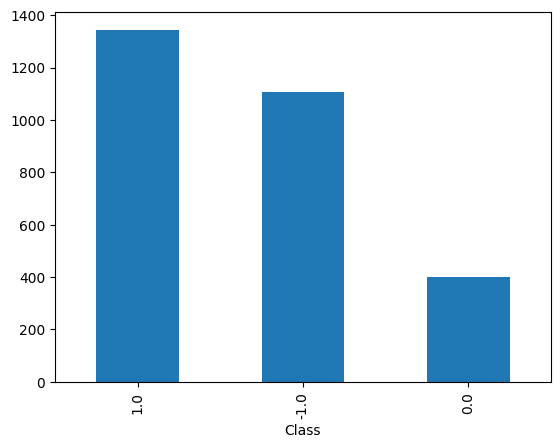

In [9]:
training_data['Class'].value_counts().plot(kind='bar')

In [10]:
training_data.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,...,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000
mean,0.174409,-0.016836,-0.025758,-0.014101,-0.064165,-0.098776,-0.099125,-0.030595,0.050841,-0.010116,...,-0.043205,-0.020662,0.012676,0.006274,0.013297,0.005058,-0.001640,0.001434,0.083450,0.033875
std,0.865584,0.069830,0.073396,0.890950,0.322077,0.345984,0.353384,0.086585,0.890315,0.068017,...,0.393947,0.630368,0.639312,0.273290,0.408575,0.374125,0.147069,0.234772,0.923245,0.147566
min,-2.432857,-0.076729,-0.057389,-0.978840,-5.288669,-3.006709,-0.716052,-0.073425,-1.705451,-0.167347,...,-3.154625,-11.712831,-16.070787,-1.479405,-1.602589,-2.933452,-2.682221,-7.577418,-1.000000,-0.517174
25%,-0.443963,-0.035794,-0.044273,-0.541814,-0.183749,-0.283263,-0.356233,-0.052964,-0.584485,-0.031396,...,-0.200375,-0.120351,-0.013233,-0.130453,-0.202897,-0.141450,-0.029858,-0.006259,-1.000000,-0.070528
50%,-0.002634,-0.028040,-0.037798,-0.252120,-0.088154,-0.112940,-0.166150,-0.045046,-0.119604,-0.020217,...,-0.023781,-0.004429,0.000527,-0.003257,-0.025911,-0.022807,-0.000850,0.001431,0.000000,0.026392
75%,0.572329,-0.016372,-0.026623,0.247947,0.041861,0.082815,0.118695,-0.028648,0.487948,-0.005671,...,0.138969,0.080364,0.014152,0.118502,0.178137,0.114011,0.028529,0.009290,1.000000,0.138892
max,5.013767,2.024282,1.998512,8.038508,7.694455,1.352110,1.835375,2.397643,5.579740,1.627671,...,2.407875,7.530753,28.167454,2.858523,3.097674,4.718076,2.147187,7.581309,1.000000,0.514455


In [20]:
# Create a mapping dictionary from the 'CODE' to 'NUM'
sector_mapping = {
    'G1': 1, 'G2': 2, 'G3': 3, 'G4': 4,
    'G5': 5, 'G6': 6, 'G7': 7, 'G8': 8,
    'G9': 9, 'G10': 10, 'G11': 11
}

training_data['Group'] = training_data['Group'].map(sector_mapping)
test_data_no_target["Group"] = test_data_no_target["Group"].map(sector_mapping)

In [40]:
# Splitting the dataset into features and target variable
X_train = training_data.drop(columns=['Class','Perform'])
y = training_data['Class']
Y_train

0      -1.0
1       1.0
4       1.0
5       1.0
6       1.0
       ... 
4429   -1.0
4430    0.0
4431   -1.0
4432   -1.0
4435    1.0
Name: Class, Length: 2852, dtype: float64

# Training a Neural Network

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjust labels to start from 0
y_train_adjusted = y_train + 1
y_test_adjusted = y_test + 1

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 units for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_adjusted, epochs=100, batch_size=32,
                    validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_adjusted)
print('Test Accuracy:', test_acc)


Epoch 1/100
57/57 [==============================] - 1s 7ms/step - loss: 1.0454 - accuracy: 0.4435 - val_loss: 1.0082 - val_accuracy: 0.4595
Epoch 2/100
57/57 [==============================] - 0s 4ms/step - loss: 0.9482 - accuracy: 0.5373 - val_loss: 1.0431 - val_accuracy: 0.4551
Epoch 3/100
57/57 [==============================] - 0s 4ms/step - loss: 0.9134 - accuracy: 0.5652 - val_loss: 1.0318 - val_accuracy: 0.4683
Epoch 4/100
57/57 [==============================] - 0s 4ms/step - loss: 0.8657 - accuracy: 0.5899 - val_loss: 1.0422 - val_accuracy: 0.4530
Epoch 5/100
57/57 [==============================] - 0s 4ms/step - loss: 0.8224 - accuracy: 0.6299 - val_loss: 1.0827 - val_accuracy: 0.4464
Epoch 6/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7776 - accuracy: 0.6513 - val_loss: 1.1202 - val_accuracy: 0.4311
Epoch 7/100
57/57 [==============================] - 0s 4ms/step - loss: 0.7459 - accuracy: 0.6579 - val_loss: 1.1642 - val_accuracy: 0.4486
Epoch 8/100
5